In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Import the Pandas library
# Read in the raw temperature and emissions datasets (they are in CSV format) 

In [0]:
import pandas as pd 
raw_t = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cse474/test/GLB.Ts+dSST.csv', skiprows=1)
raw_t = raw_t.iloc[:,:13]
raw_e = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cse474/test/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_511927.csv', skiprows=3)

In [0]:
# Create new dataframe with an index for each month
# First create the date range
date_rng = pd.date_range(start='1/1/1880', end='1/03/2019', freq='M')

type(date_rng[0])
### returns 
### pandas._libs.tslibs.timestamps.Timestamp

# Next create the empty DataFrame, which we will populate using the actual data
t = pd.DataFrame(date_rng, columns=['date'])

# Create a column for the anomoly values
t['Avg_Anomaly_deg_C'] = None

# Set the index of the DataFrame to the date column (DateTime index)
t.set_index('date', inplace=True)

# Show the first few elements
#t.head()

In [0]:
# Import relevant libraries
import calendar
from datetime import datetime

# Function definition
def populate_df_with_anomolies_from_row(row):
    year = row['Year']
    # Anomaly values (they seem to be a mixture of strings and floats)
    monthly_anomolies = row.iloc[1:]
    # Abbreviated month names (index names)
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        # Get the last day for each month 
        last_day = calendar.monthrange(year,datetime.strptime(month, '%b').month)[1]
        # construct the index with which we can reference our new DataFrame (to populate) 
        date_index = datetime.strptime(f'{year} {month} {last_day}', '%Y %b %d')
        # Populate / set value @ above index, to anomaly value
        t.loc[date_index] = monthly_anomolies[month]

# Apply function to each row of raw data 
_ = raw_t.apply(lambda row: populate_df_with_anomolies_from_row(row), axis=1)

# Show the first few elements of our newly populated DataFrame
#t.head()

In [0]:
import numpy as np

# Define function to convert values to floats, and return a 'NaN = Not a Number' if this is not possible
def clean_anomaly_value(raw_value):
    try:
        return float(raw_value)
    except:
        return np.NaN
    
# Apply above function to all anomaly values in DataFrame
t['Avg_Anomaly_deg_C'] = t['Avg_Anomaly_deg_C'].apply(lambda raw_value: clean_anomaly_value(raw_value))

# 'Forward fill' to take care of NaN values
t.fillna(method='ffill', inplace=True)

# Show the first few elements of our newly cleaned DataFrame
#t.head()

In [0]:
# import Matplotlib
import matplotlib.pyplot as plt
# Allow for graphs to be displayed in Jupyter notebook
%matplotlib inline

In [0]:
# Define function to pull value from raw data, using DateIndex from new DataFrame row
def populate_df(row):
    index = str(row['date'].year)
    value = raw_e_world.loc[index]
    return value
  
# Select just the co2 emissions for the 'world', and the columns for the years 1960-2018 
raw_e_world = raw_e[raw_e['Country Name']=='World'].loc[:,'1960':'2018']

# 'Traspose' the resulting slice, making the columns become rows and vice versa
raw_e_world = raw_e_world.T
raw_e_world.columns = ['value']

# Create a new DataFrame with a daterange the same the range for.. 
# the Temperature data (after resampling to years)
date_rng = pd.date_range(start='31/12/1960', end='31/12/2018', freq='y')
e = pd.DataFrame(date_rng, columns=['date'])

# Populate the new DataFrame using the values from the raw data slice
v = e.apply(lambda row: populate_df(row), axis=1)
e['Global CO2 Emissions per Capita'] = v
e.set_index('date', inplace=True)
#e.head()
e.fillna(method='ffill', inplace=True)

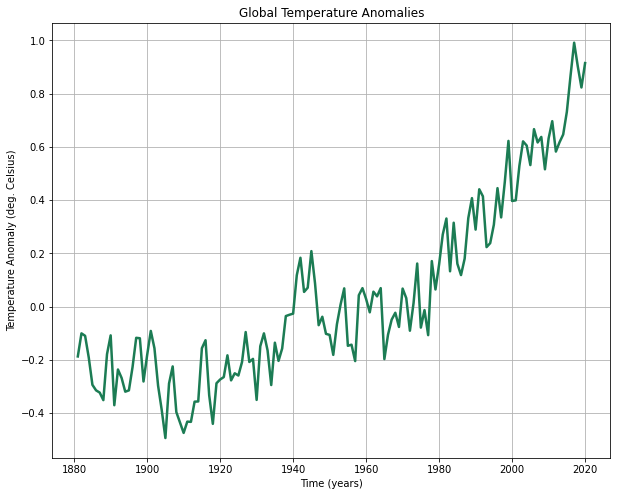

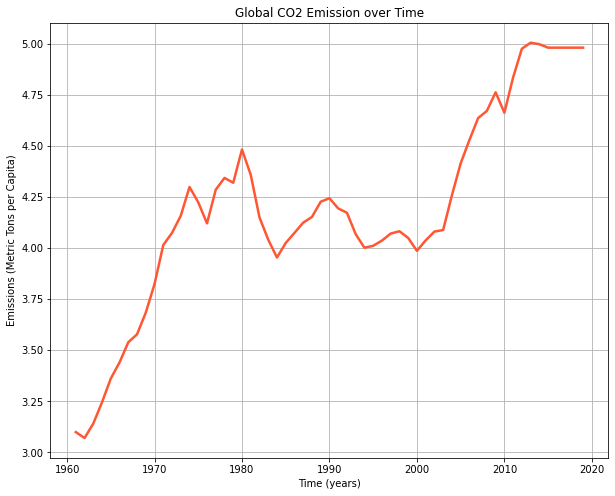

In [0]:
t_resampled = t.resample('A').mean()

# Create figures and axes
fig, ax = plt.subplots(figsize=(10,8))

# Plot temperature data with specific colour and line thickness
ax.plot(t_resampled, color='#1C7C54', linewidth=2.5)

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Temperature Anomaly (deg. Celsius)',
       title='Global Temperature Anomalies')

# Enable grid
ax.grid()
# Create figures and axes
fig, ax = plt.subplots(figsize=(10,8))

# Plot co2 emissions data with specific colour and line thickness
ax.plot(e, color='#FF5733', linewidth=2.5)

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Emissions (Metric Tons per Capita)',
       title='Global CO2 Emission over Time')

# Enable grid
ax.grid()

In [0]:
xx = raw_e.iloc[:, 4:59]
#xx['c_code'] = raw_e.iloc[:, 1:2]
xx.tail()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,0.683679,0.494324,0.71013,0.525293,0.644143,0.686312,0.595799,0.517041,1.940466,0.767437,0.405577,0.313630,0.234116,0.420242,0.339045,0.319965,0.368387,0.415295,0.418921,0.420264,0.417864,0.514063,0.696341,0.713607,0.778529,0.904474,0.831807,0.841254,0.894977,0.893385,0.819517,0.748475,0.768266,0.638507,0.634010,0.701763,0.687684,0.836202,0.741634,0.821118,0.841075,0.904554,0.854733,0.911487,0.966289,0.996838,1.030386,0.985390,1.020428,1.090827,1.011975,0.826044,0.762823,1.013900,0.878996
261,5.727221,5.832621,5.88717,5.961336,6.332342,6.616544,6.453861,6.560824,6.593620,6.665435,6.785930,7.437296,7.376052,7.256836,7.198226,7.350683,7.474399,7.550741,7.446834,7.866690,7.999998,8.773991,9.311609,9.428691,9.922516,9.921215,9.877464,9.593208,9.773399,9.493669,8.513600,8.653758,7.801071,8.100407,8.361297,8.742673,8.626706,8.982420,8.647141,8.462993,8.420830,8.163977,7.727642,8.657236,9.519375,8.707407,9.236950,9.498786,9.979458,9.967159,9.256681,9.048936,8.872523,8.686590,8.979062
262,NaN,NaN,NaN,NaN,0.946606,1.096876,0.951121,1.261961,1.166853,1.056845,0.902038,0.877861,0.910556,0.993839,0.879394,0.825640,0.787503,0.708080,0.635726,0.637301,0.603456,0.555921,0.561825,0.504629,0.420787,0.397784,0.404311,0.366559,0.413596,0.332929,0.304334,0.293034,0.290710,0.288904,0.272863,0.238645,0.200238,0.249112,0.234519,0.178277,0.174972,0.178339,0.180815,0.187638,0.185721,0.192996,0.188267,0.154271,0.168958,0.189800,0.197823,0.209458,0.253506,0.265078,0.292412
263,NaN,NaN,NaN,NaN,1.034903,1.166242,1.307900,1.108579,1.291859,1.320779,1.543255,1.596158,1.449632,1.579042,1.488477,1.321987,1.671491,1.385335,1.341457,1.319808,1.300765,1.229246,1.107255,1.267386,1.158913,1.156175,1.426918,1.599635,1.634845,1.594088,1.499501,1.493786,1.560590,1.475029,1.580213,1.325951,1.299201,1.236363,1.213377,1.339295,1.171874,1.056377,1.000931,0.889343,0.789234,0.891798,0.859470,0.806649,0.627678,0.447289,0.612528,0.741686,0.594152,0.874563,0.884721


In [0]:
xx.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,193.000000,194.000000,196.000000,197.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,205.000000,206.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,209.000000,209.000000,209.000000,209.000000,215.000000,217.000000,241.000000,241.000000,242.000000,243.000000,243.000000,244.000000,245.000000,245.000000,245.000000,245.000000,246.000000,246.000000,246.000000,247.000000,248.000000,249.000000,249.000000,249.000000,249.000000,249.000000,251.000000,251.000000,250.000000
mean,2.037282,2.150171,2.241690,2.753812,2.916141,3.035673,3.049316,3.116120,3.315619,3.927816,4.204099,4.427336,4.494008,4.812818,4.507408,4.377664,4.368837,4.499300,4.526618,4.577355,4.475246,4.003176,3.883912,3.735079,3.833816,3.927593,3.913394,3.950233,4.084677,4.219883,4.087860,4.125632,4.482813,4.505842,4.428009,4.478244,4.496961,4.495002,4.485427,4.453672,4.583647,4.637700,4.605110,4.737570,4.784463,4.826155,4.901256,4.930568,4.935583,4.721868,4.847677,4.811059,4.955428,4.872777,4.886320
std,4.184849,4.377180,4.717044,8.443484,8.493180,8.706497,8.062852,7.263779,7.187105,9.921855,9.263233,9.886576,10.141886,10.766220,9.198437,8.467537,8.085626,8.012298,8.069064,7.968325,7.429310,6.211035,5.797967,5.297735,5.576488,5.617238,5.537729,5.336876,5.485957,5.738058,5.639184,5.694542,6.025123,6.347220,6.247433,6.392206,6.252384,6.563317,6.179797,5.966715,6.380133,6.535791,6.335804,6.387948,6.304327,6.408915,6.528367,6.353846,6.134005,5.811829,5.858565,5.786095,6.155163,5.840759,6.068998
min,0.007984,0.007857,0.008435,0.009336,0.011589,0.011851,0.013248,0.011791,-0.020098,0.016104,0.012334,0.011946,0.011574,0.011215,0.009735,0.009747,0.009905,0.010192,0.007379,0.004333,0.035283,0.029589,0.028209,0.030747,0.041402,0.035264,0.035641,0.036583,0.011809,0.017783,0.023982,0.010720,0.013268,0.013966,0.015142,0.015693,0.017195,0.019060,0.019350,0.020034,0.017282,0.017264,0.018603,0.019182,0.022595,0.020912,0.024582,0.023787,0.023466,0.022707,0.024515,0.027016,0.030539,0.030365,0.044700
25%,0.183316,0.180620,0.198531,0.199338,0.214492,0.233321,0.242972,0.251838,0.280633,0.320451,0.349795,0.340798,0.355732,0.368516,0.371617,0.380724,0.362854,0.387947,0.401433,0.438602,0.448290,0.466774,0.453681,0.450120,0.475806,0.473886,0.441159,0.483382,0.500122,0.497808,0.457140,0.440831,0.569229,0.528187,0.568108,0.587897,0.620413,0.678608,0.675733,0.726635,0.742181,0.757221,0.755792,0.783483,0.828754,0.859606,0.808379,0.898907,0.816057,0.827852,0.815799,0.832929,0.836163,0.866682,0.880427
50%,0.612271,0.636830,0.654542,0.640002,0.765958,0.695949,0.750375,0.802935,1.004495,1.056845,1.000292,1.103881,1.111408,1.136338,1.233332,1.285485,1.361852,1.412222,1.518657,1.580338,1.528621,1.581525,1.479083,1.365647,1.447949,1.540763,1.588908,1.637335,1.755377,1.641918,1.678107,1.864979,2.295183,2.286818,2.229188,2.326499,2.411662,2.282605,2.256440,2.268336,2.344271,2.540171,2.544182,2.644354,2.672370,2.757264,2.929917,2.823702,3.029991,2.939359,2.935527,2.951649,3.027053,3.042065,3.091317
75%,1.694988,1.726250,1.939525,1.710527,1.998806,2.190061,2.455830,2.923741,3.257972,3.597430,4.014685,4.502778,4.525627,5.223770,4.664393,4.898802,5.173553,5.322942,5.746698,5.496695,5.492031,5.307244,5.376697,5.408734,5.273742,5.573662,4.977945,5.386307,5.796251,5.837883,5.914871,5.988953,6.471896,6.655498,6.446692,6.477661,6.758176,6.576799,6.553864,6.696470,6.603843,6.938325,6.956241,7.251943,7.142759,7.037947,7.052989,6.916701,7.010559,6.413945,6.642697,6.715381,6.694898,6.745239,6.391435
max,36.685183,36.583778,42.360705,99.464612,92.860862,85.458585,78.625153,77.502352,75.967182,101.051663,69.111602,

In [0]:
np.mean(xx['1960'])
xx.iloc[0:1, 0:1]

,1960
0,NaN


In [0]:
xx = xx.fillna(value=xx.min())
xx['c_code'] = raw_e.iloc[:, 1:2]
xx.head(1000)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,c_code
0,0.007984,0.007857,0.008435,0.009336,0.011589,0.011851,0.013248,0.011791,-0.020098,0.016104,0.012334,0.011946,0.011574,0.011215,0.009735,0.009747,0.009905,0.010192,0.007379,0.004333,0.035283,0.029589,0.028209,0.030747,0.041402,0.035264,2.868319,7.235198,10.026179,10.634733,26.374503,26.046130,21.442559,22.000786,21.036245,20.771936,20.318353,20.426818,20.587669,20.311567,26.194875,25.934024,25.671162,26.420452,26.517293,27.200708,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,ABW
1,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.123410,0.115142,0.086510,0.149651,0.165208,0.129996,0.135367,0.154503,0.167612,0.153558,0.181522,0.161894,0.167066,0.131783,0.150615,0.163104,0.201224,0.231961,0.293957,0.267772,0.269230,0.246823,0.233882,0.210643,0.183364,0.096197,0.085087,0.075806,0.068640,0.062435,0.056642,0.052763,0.040723,0.037235,0.037846,0.047377,0.050481,0.038410,0.051744,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.310341,0.293946,AFG
2,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,0.268941,0.172102,0.289718,0.480234,0.608224,0.564548,0.721246,0.751240,0.720776,0.628569,0.451354,0.469221,0.694737,0.683063,0.640966,0.611135,0.519355,0.551349,0.520983,0.471903,0.451619,0.544085,0.463508,0.437295,0.431744,0.415531,0.410523,0.441721,0.288119,0.787033,0.726233,0.496361,0.475815,0.577083,0.581961,0.574316,0.722959,0.500225,1.001878,0.985736,1.105019,1.203134,1.185000,1.234425,1.244092,1.252681,1.330219,1.253776,1.290307,AGO
3,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,1.333055,1.363746,1.519551,1.558968,1.753240,1.989498,2.515914,2.303897,1.849007,1.910634,2.013585,2.275876,2.530625,2.898209,1.935058,2.693024,2.624857,2.683240,2.694291,2.658015,2.665356,2.414061,2.331599,2.783243,1.678107,1.312213,0.774725,0.723790,0.600204,0.654537,0.636625,0.490365,0.560271,0.960164,0.978175,1.053304,1.229541,1.412697,1.376213,1.412498,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.692908,1.749211,1.978763,ALB
4,0.007984,0.007857,0.008435,0.009336,0.011589,0.011851,0.013248,0.011791,-0.020098,0.016104,0.012334,0.011946,0.011574,0.011215,0.009735,0.009747,0.009905,0.010192,0.007379,0.004333,0.035283,0.029589,0.028209,0.030747,0.041402,0.035264,0.035641,0.036583,0.011809,0.017783,7.467336,7.182457,6.912053,6.736055,6.494200,6.662052,7.065071,7.239713,7.660784,7.975454,8.019284,7.786950,7.590615,7.315761,7.358625,7.299872,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906,AND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.007984,0.007857,0.008435,0.009336,0.011589,0.011851,0.013248,0.011791,-0.020098,0.016104,0.012334,0.011946,0.011574,0.011215,0.009735,0.009747,0.009905,0.010192,0.007379,0.004333,0.035283,0.029589,0.028209,0.030747,0.041402,0.035264,0.035641,0.036583,0.011809,0.017783,0.023982,0.010720,0.013268,0.013966,0.015142,0.015693,0.017195,0.019060,0.019350,0.020034,0.017282,0.017264,0.018603,0.019182,0.022595,0.020912,0.024582,0.023787,0.023466,0.022707,0.024515,0.027016,0.030539,0.030365,0.044700,XKX
260,0.683679,0.494324,0.710130,0.525293,0.644143,0.686312,0.595799,0.517041,1.940466,0.767437,0.405577,0.313630,0.234116,0.420242,0.339045,0.319965,0.368387,0.415295,0.418921,0.420264,0.417864,0.514063,0.696341,0.713607,0.778529,0.904474,0.831807,0.841254,0.894977,0.893385,0.819517,0.748475,0.768266,0.638507,0.634010,0.701763,0.687684,0.836202,0.741634,0.821118,0.841075,0.904554,0.854733,0.911487,0.966289,0.996838,1.030386,0.985390,1.020428,1.090827

In [0]:
#xx.to_csv(r'/content/sample_data/xx.csv')
!pip install geopandas

     |████████████████████████████████| 931kB 18.4MB/s 
     |████████████████████████████████| 10.4MB 1.5MB/s 
     |████████████████████████████████| 14.7MB 215kB/s 


In [0]:
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head(1000)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


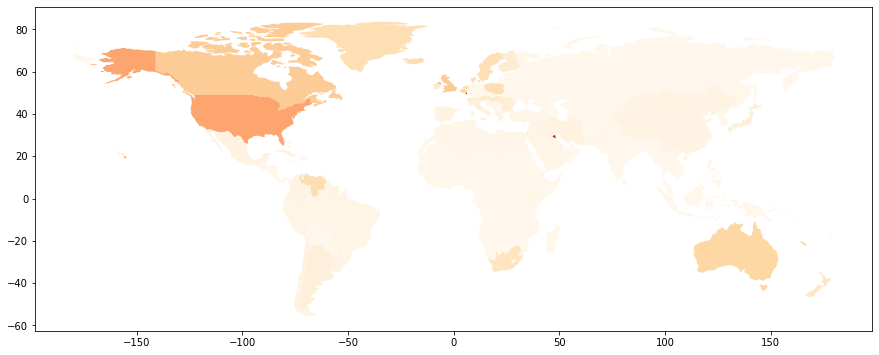

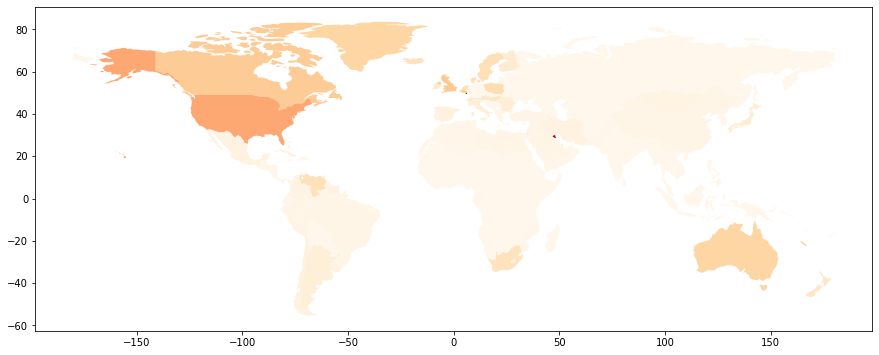

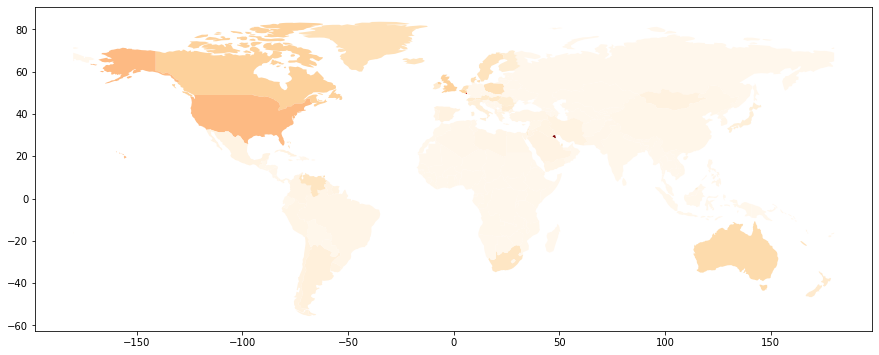

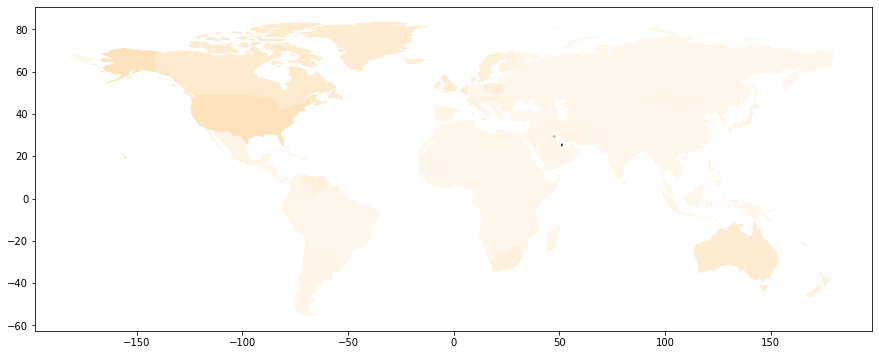

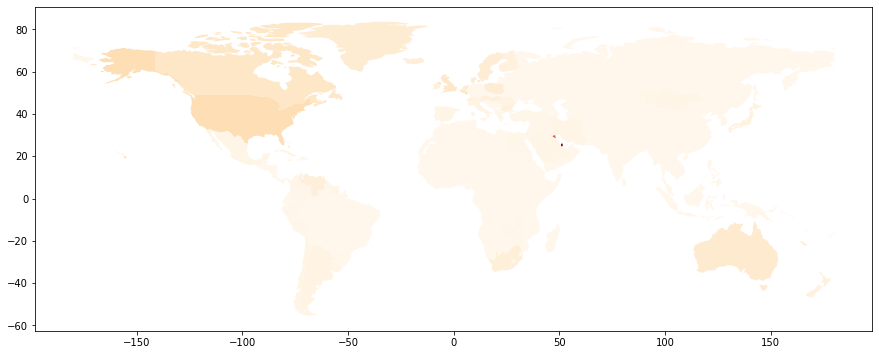

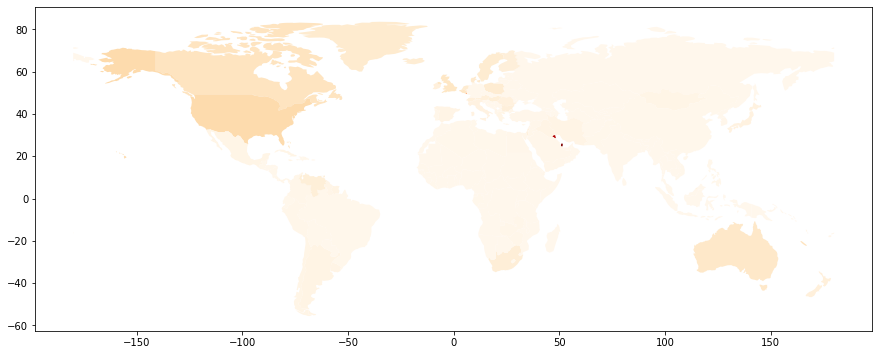

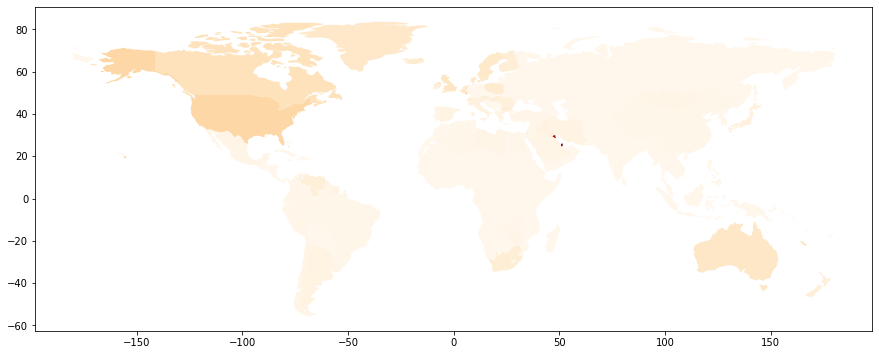

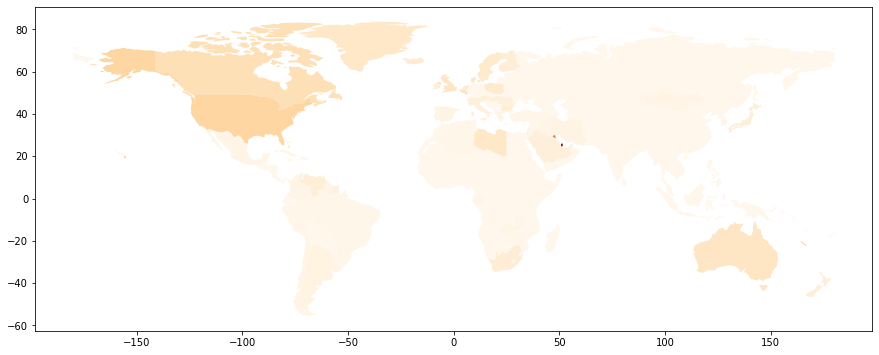

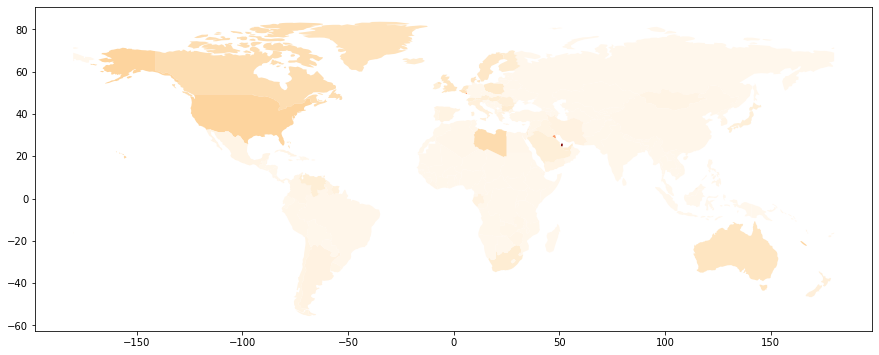

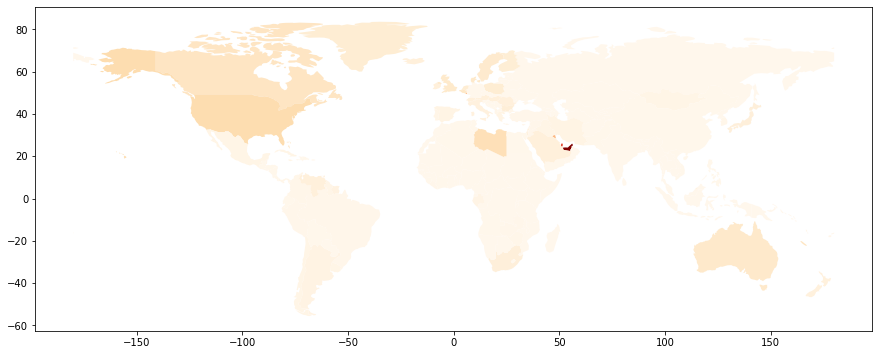

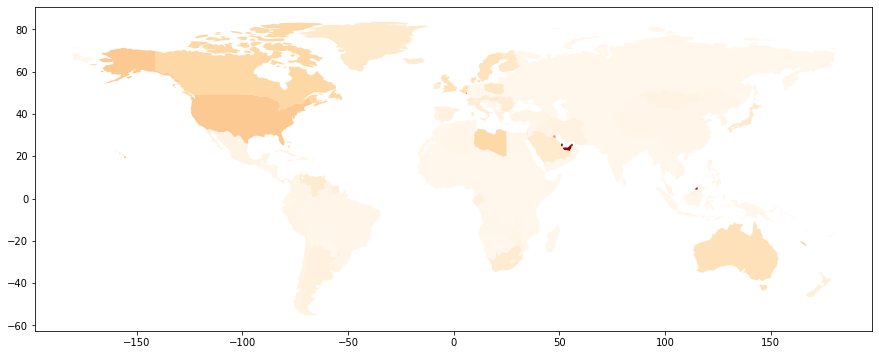

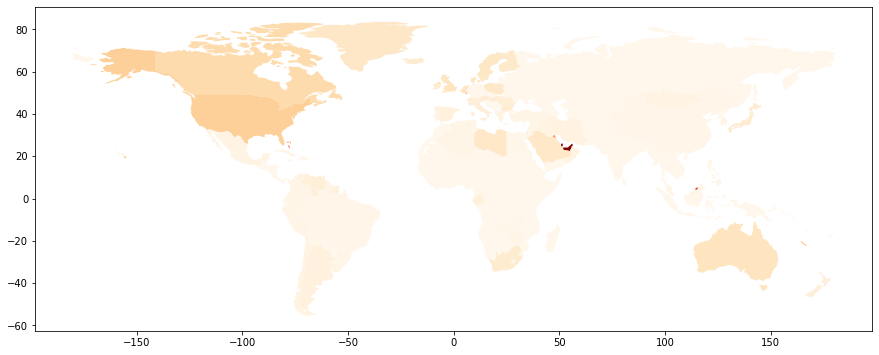

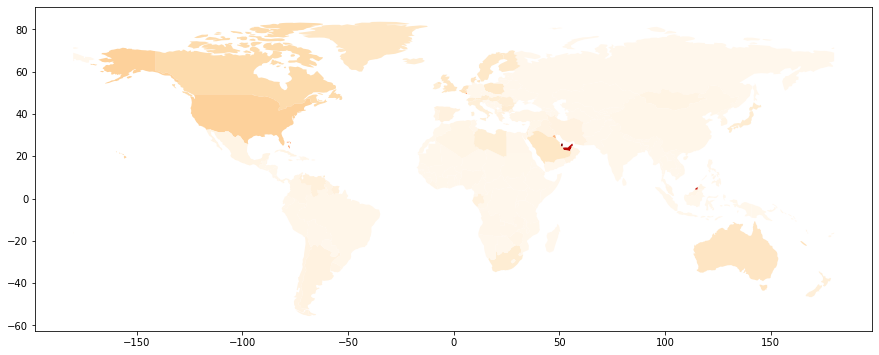

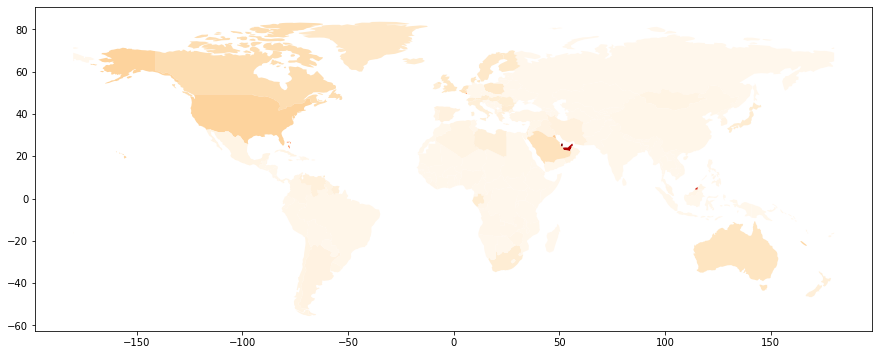

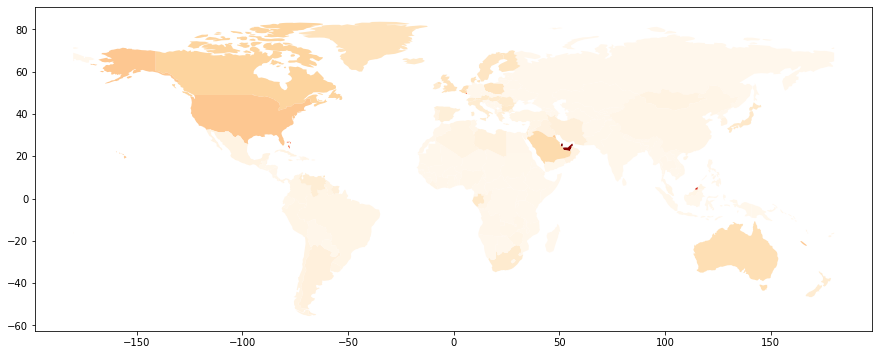

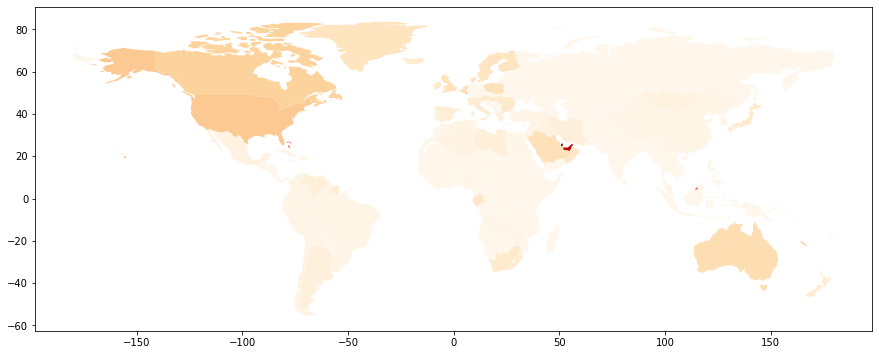

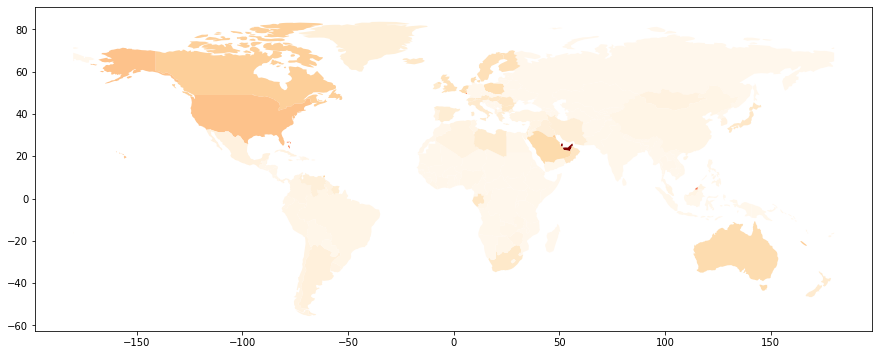

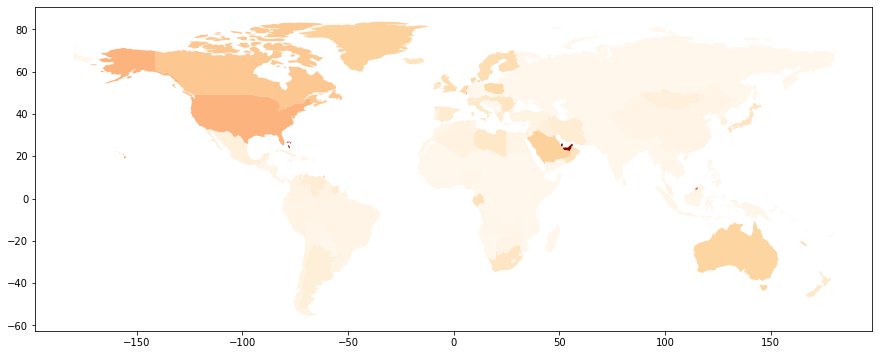

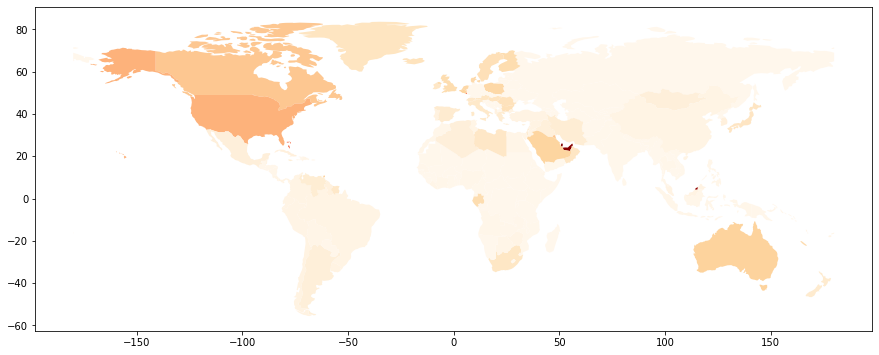

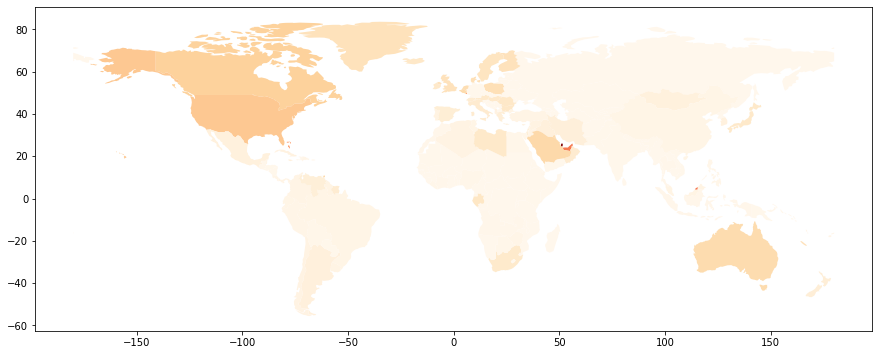

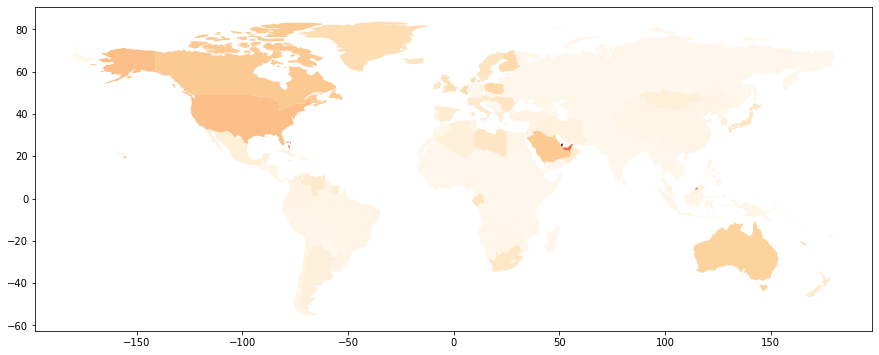

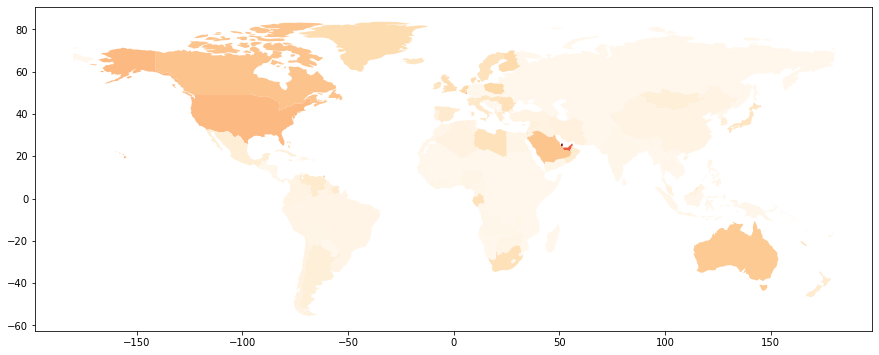

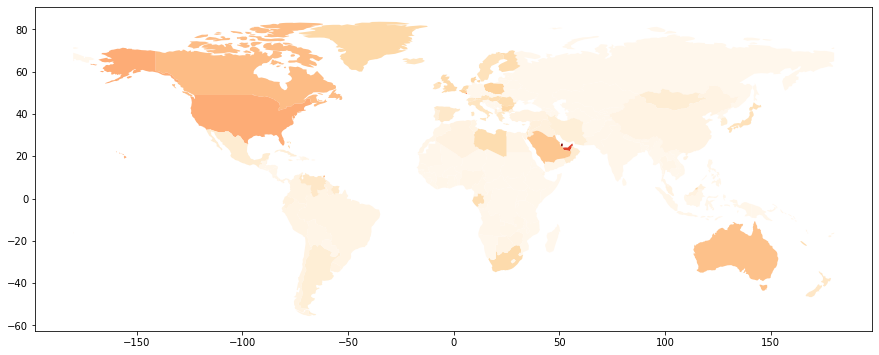

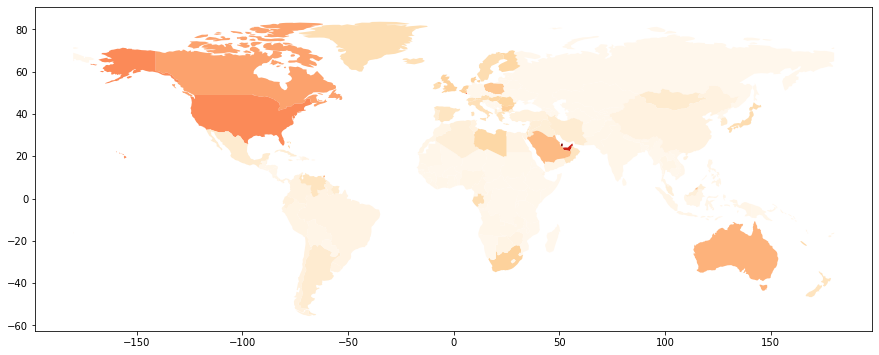

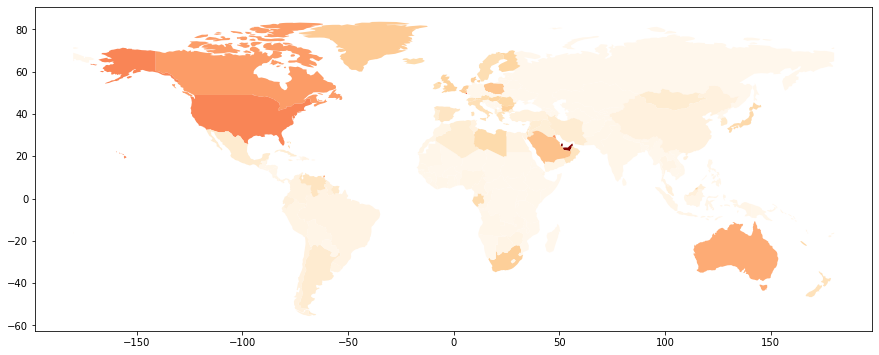

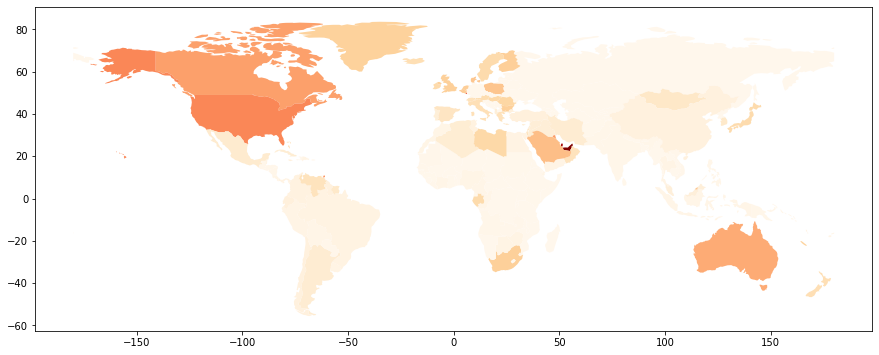

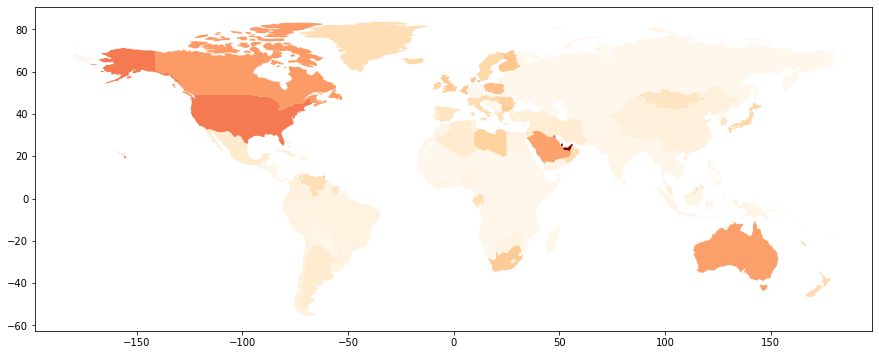

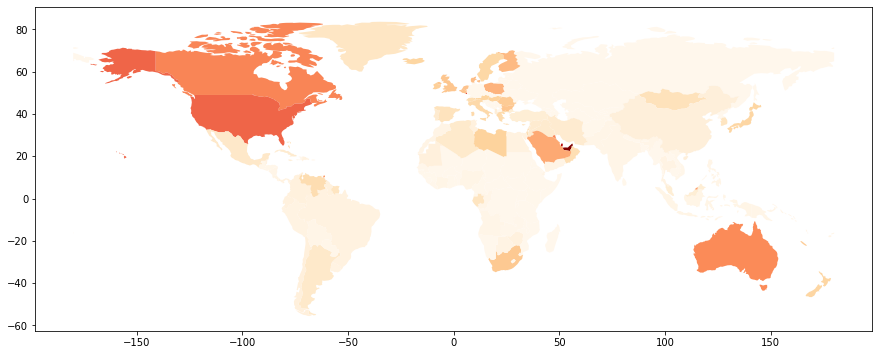

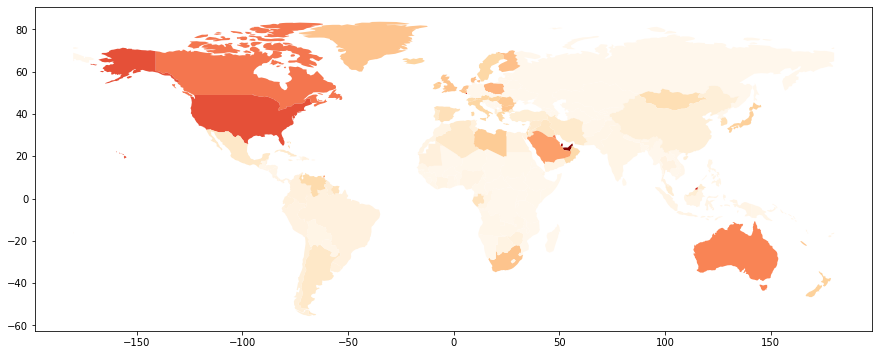

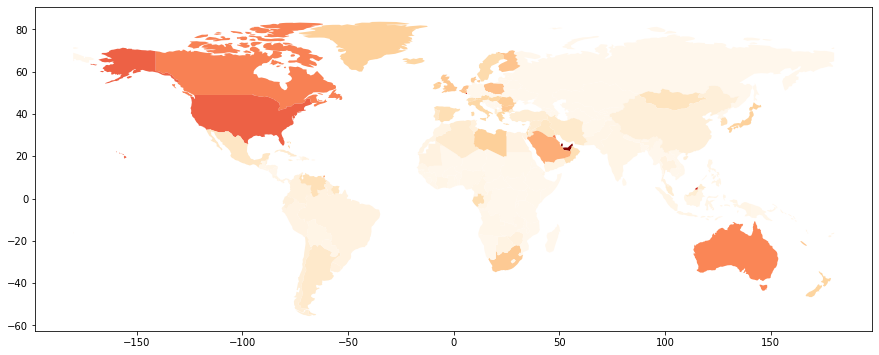

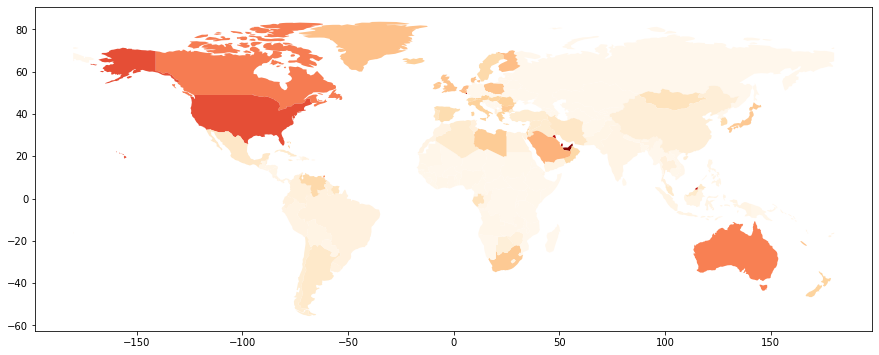

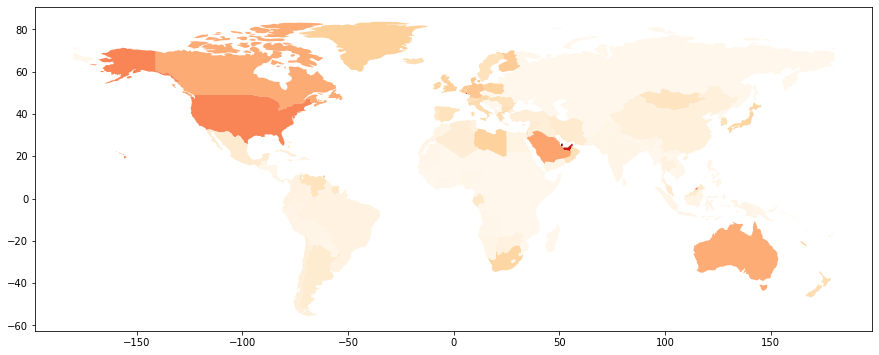

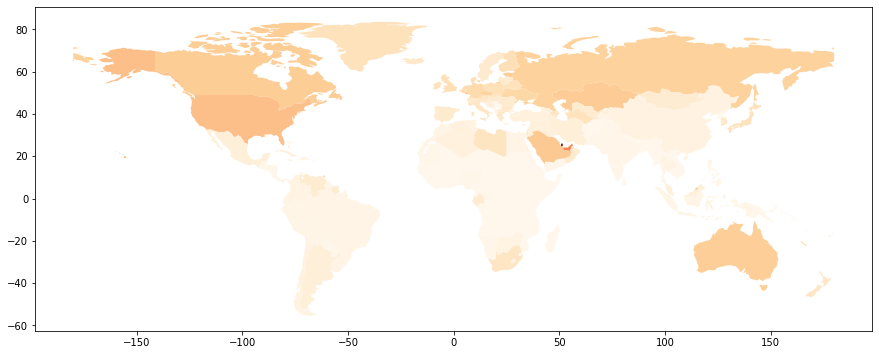

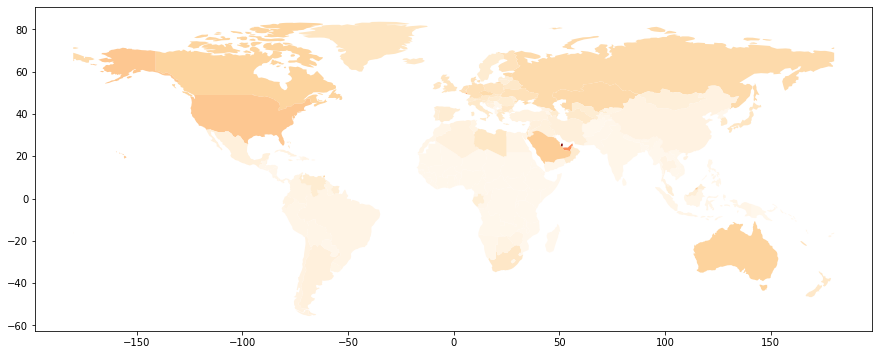

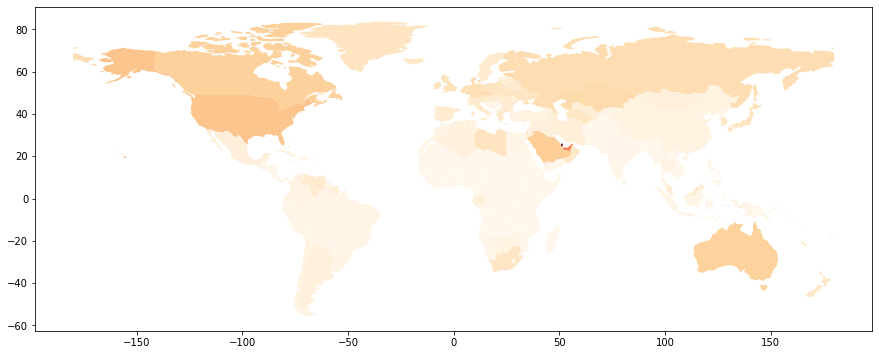

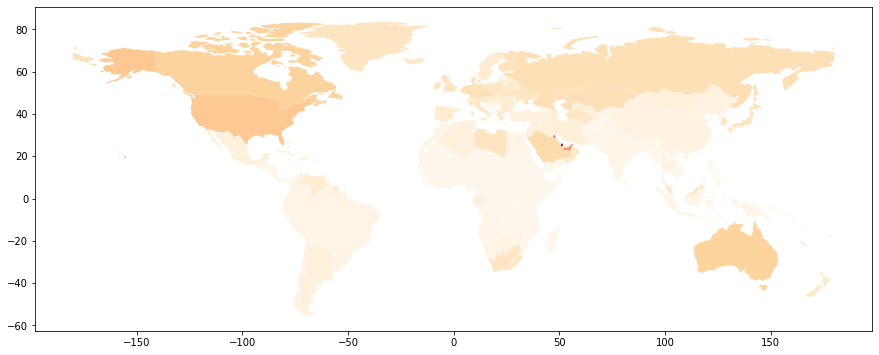

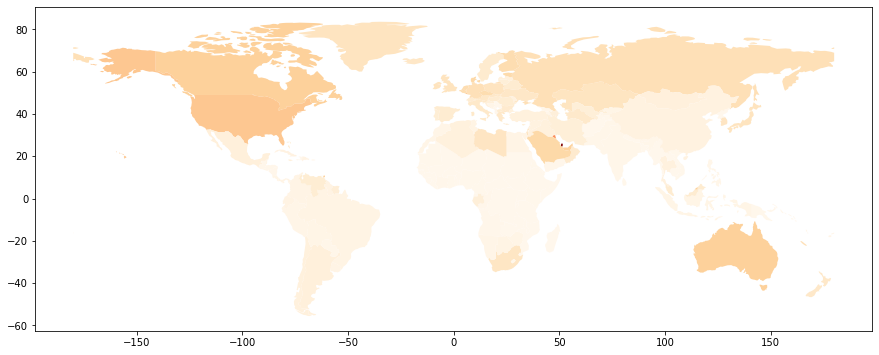

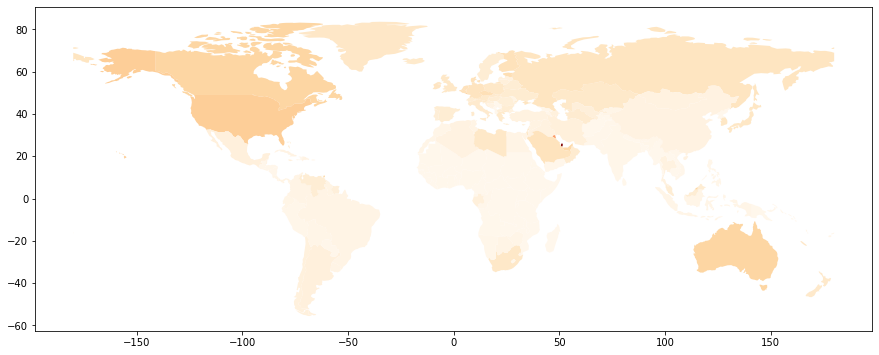

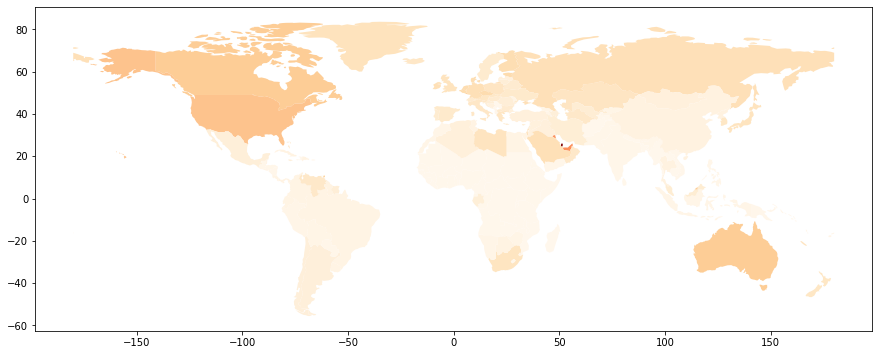

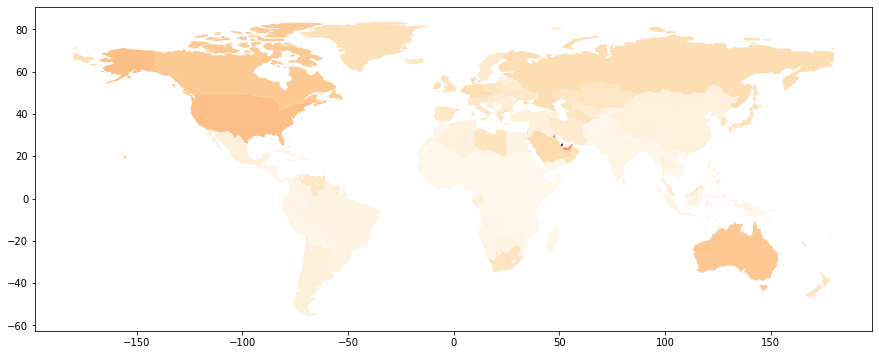

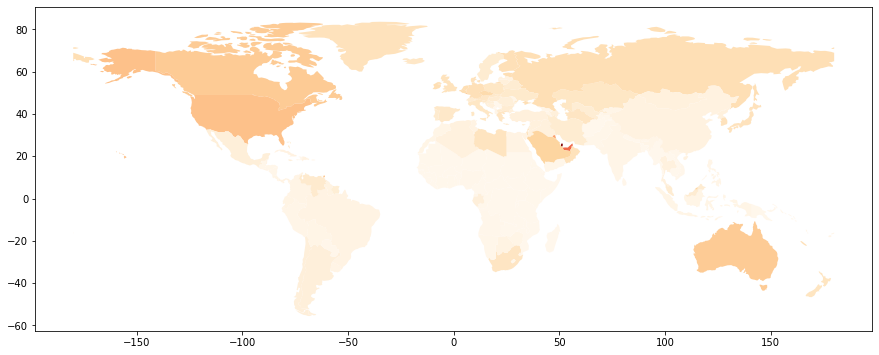

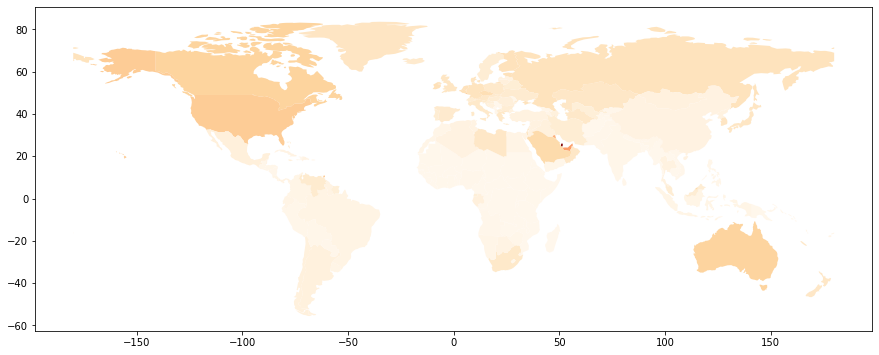

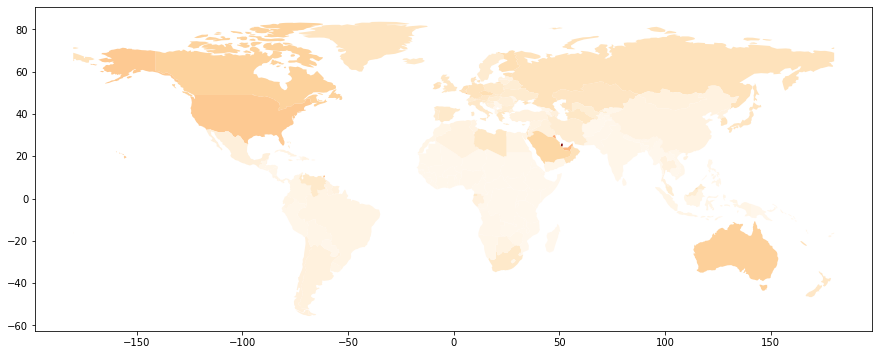

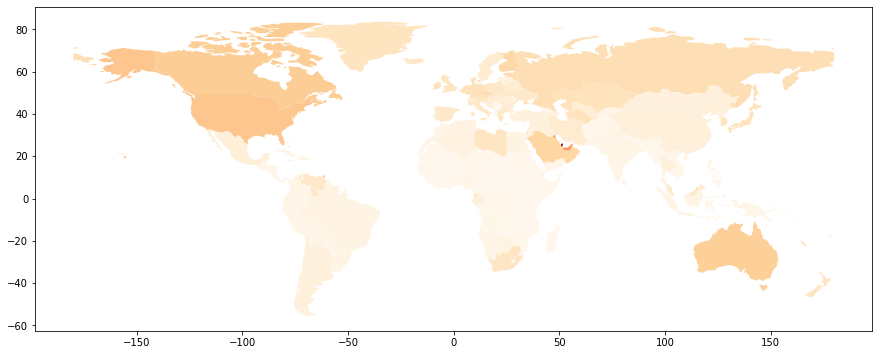

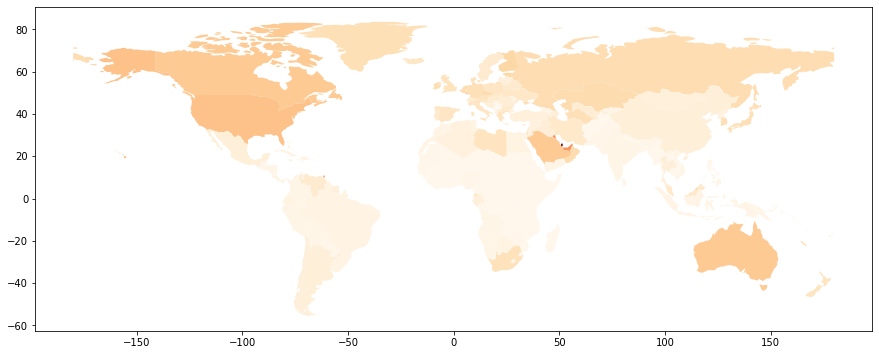

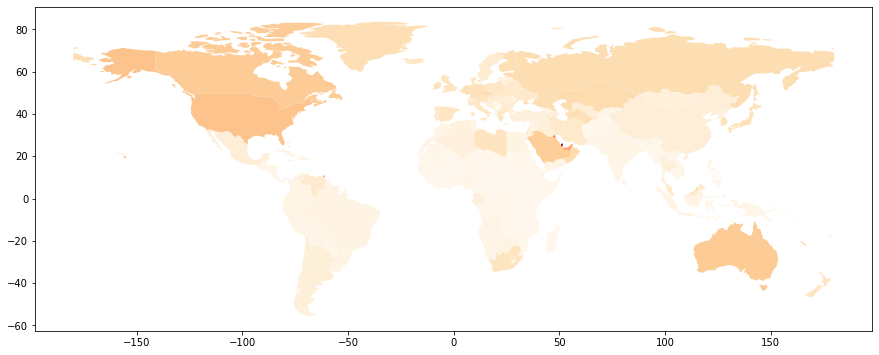

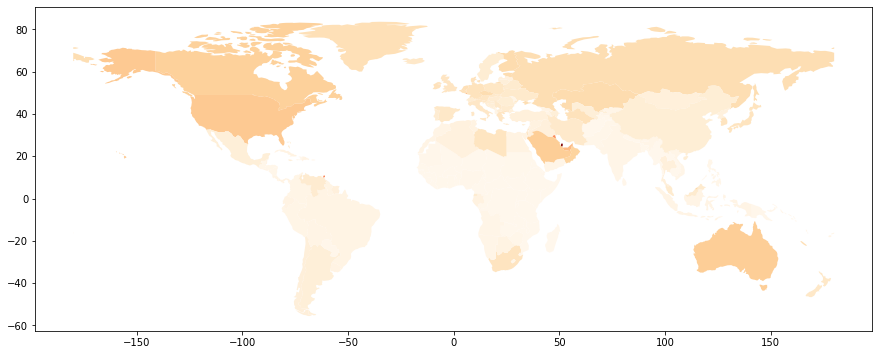

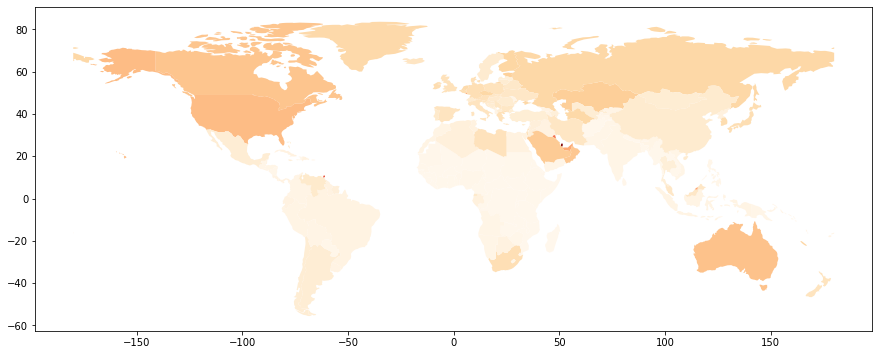

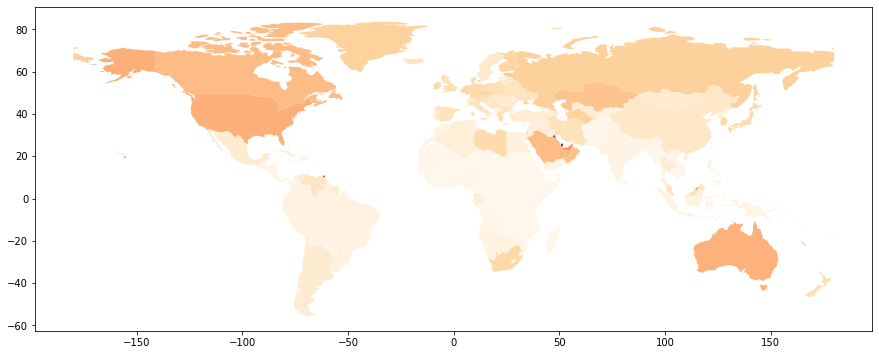

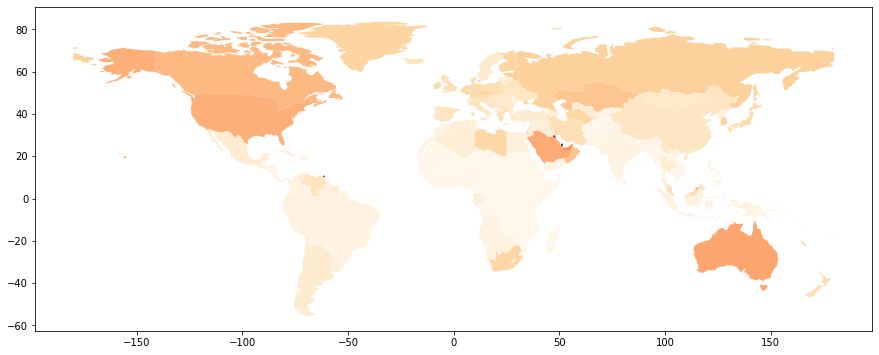

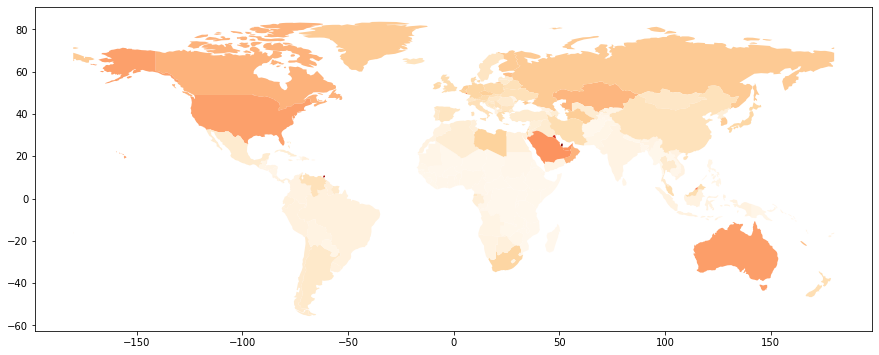

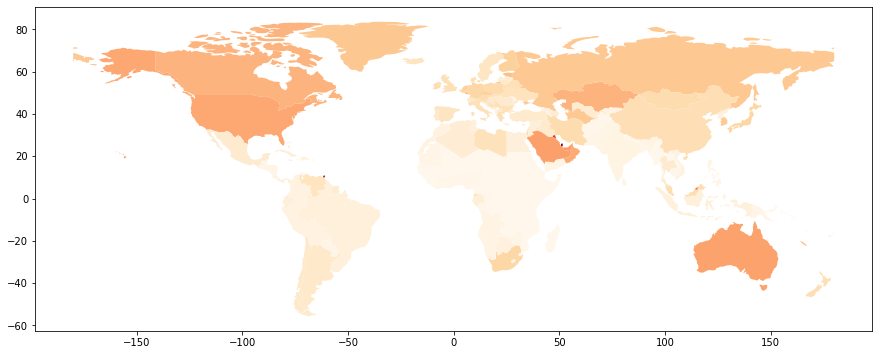

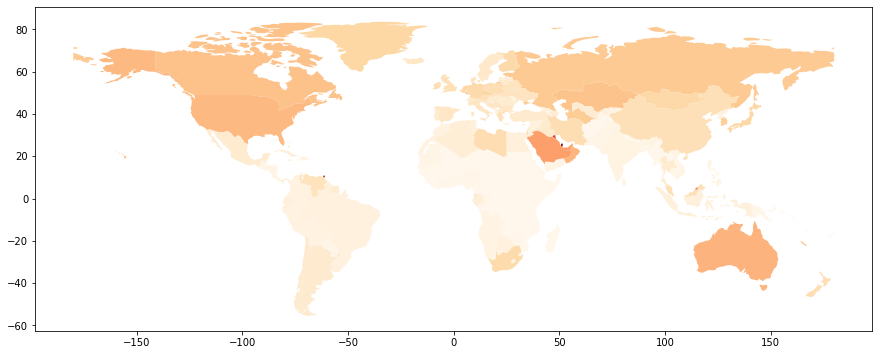

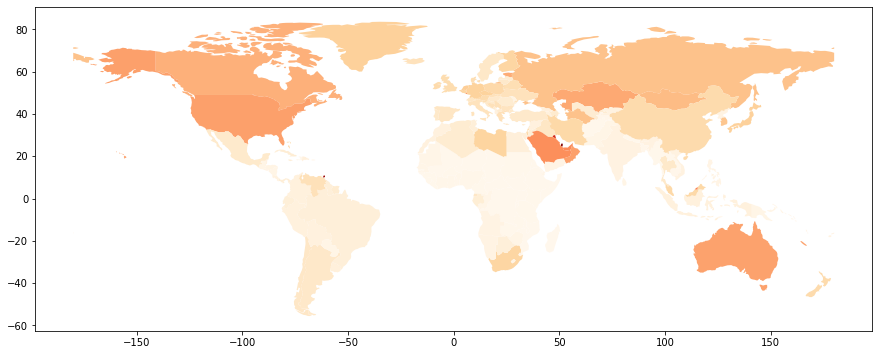

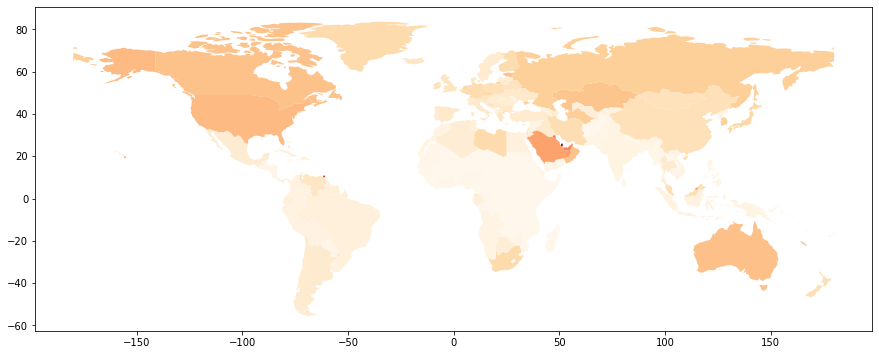

In [0]:
import warnings
warnings.filterwarnings("ignore")
for idx in range(55):
  for i in range(264):
    s = xx.at[i, 'c_code']
    for j in range(177):
      s1 = world.at[j, 'iso_a3']
      if(s == s1):
        world.at[j, 've'] = xx.iat[i, idx]
        break
  fig, ax = plt.subplots(figsize=(15,13))
  #divider = make_axes_locatable(ax)
  #cax = divider.append_axes("right", size="2%", pad=0.1)
  world.plot(column='ve', ax=ax, legend=False, legend_kwds={'label': "carbon emissions by country in {0}".format(idx + 1960), 'orientation': "horizontal"}, cmap='OrRd');
  #plt.savefig('/content/drive/My Drive/Colab Notebooks/cse474/test/imgs/a/foo{0}.png'.format(idx + 1960))
  plt.show()
  print("\n\n")